<img src="https://www.topchinatravel.com/pic/china-guide/chinese-cuisine-top2.jpg" alt="Chinese Cuisine" title="Chinese Cuisine" />

# <font color=red>Recommendation for The Location and Style of A New Chinese Restaurant in New York City Neighborhoods</font>

***
***

## <font color=blue>1. Import necessary libraries</font>

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip3 install geopy

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## <font color=blue>2. Import the neighborhood location data of the New York City from the .json file</font>

In [75]:
# Open json file and import the data
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
newyork_data['features'][0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [3]:
# Extract neighborhood data from the nested dictionary and check one of the neighborhood
neighborhoods_data = newyork_data['features']
neighborhoods_data[138]

{'type': 'Feature',
 'id': 'nyu_2451_34572.139',
 'geometry': {'type': 'Point',
  'coordinates': [-73.83177300329582, 40.76445419697846]},
 'geometry_name': 'geom',
 'properties': {'name': 'Flushing',
  'stacked': 1,
  'annoline1': 'Flushing',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Queens',
  'bbox': [-73.83177300329582,
   40.76445419697846,
   -73.83177300329582,
   40.76445419697846]}}

In [4]:
# define the dataframe columns for the NYC neighborhoods dataframe
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# initiate the dataframe and have a check on it
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [5]:
# Retrieve neighborhoods name and location data with a loop and add them into the empty dataframe
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

# Check on the NYC neighborhoods dataframe
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [6]:
# Make sure the NYC neighborhoods dataframe contains 5 boroughs and 306 neighborhoods
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


## <font color=blue>3. Prepare the list of the Chinese restaurants category IDs for Foursquare API request</font>

In [8]:
# Import the list of the Chinese restaurants category IDs from .csv file which was retrieved from Foursquare.com
CNRestaurants_IDs = pd.read_csv('CN_Restaurants_Category_ID_List.csv', index_col = False)
print(CNRestaurants_IDs.shape)
CNRestaurants_IDs.head()

(33, 2)


,Restaurant Category,Category ID
0,Anhui Restaurant,52af3a5e3cf9994f4e043bea
1,Beijing Restaurant,52af3a723cf9994f4e043bec
2,Cantonese Restaurant,52af3a7c3cf9994f4e043bed
3,Cha Chaan Teng,58daa1558bbb0b01f18ec1d3
4,Chinese Aristocrat Restaurant,52af3a673cf9994f4e043beb


In [9]:
# Creat the right format category IDs (seperated with ',') for the Foursquare API request
list_of_categorieIDs = CNRestaurants_IDs['Category ID'].to_list()
categoryId = ','.join(list_of_categorieIDs)
categoryId

'52af3a5e3cf9994f4e043bea,52af3a723cf9994f4e043bec,52af3a7c3cf9994f4e043bed,58daa1558bbb0b01f18ec1d3,52af3a673cf9994f4e043beb,52af3a903cf9994f4e043bee,4bf58dd8d48988d1f5931735,52af3a9f3cf9994f4e043bef,52af3aaa3cf9994f4e043bf0,52af3ab53cf9994f4e043bf1,52af3abe3cf9994f4e043bf2,52af3ac83cf9994f4e043bf3,52af3ad23cf9994f4e043bf4,52af3add3cf9994f4e043bf5,52af3af23cf9994f4e043bf7,52af3ae63cf9994f4e043bf6,52af3afc3cf9994f4e043bf8,52af3b053cf9994f4e043bf9,52af3b213cf9994f4e043bfa,52af3b293cf9994f4e043bfb,52af3b343cf9994f4e043bfc,52af3b3b3cf9994f4e043bfd,52af3b463cf9994f4e043bfe,52af3b633cf9994f4e043c01,52af3b513cf9994f4e043bff,52af3b593cf9994f4e043c00,52af3b6e3cf9994f4e043c02,52af3b773cf9994f4e043c03,52af3b813cf9994f4e043c04,52af3b893cf9994f4e043c05,52af3b913cf9994f4e043c06,52af3b9a3cf9994f4e043c07,52af3ba23cf9994f4e043c08'

## <font color=blue>4. Make the Foursquare API requests to explore nearby recommmended Chinese restaurants within the NYC neighborhoods</font>

In [11]:
# Set up the Foursquare API request credentials
CLIENT_ID = '3VQHRODNDS1BIN1CHVDGSYBS1CTPVON4IHPNZDBFXAPPRD3M' # your Foursquare ID
CLIENT_SECRET = 'EWHAW1XQU3TPK1XKYOZGJR5BBBJYAMUF0RBGMA1JHYGNGMH3' # your Foursquare Secret
VERSION = '20190706' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3VQHRODNDS1BIN1CHVDGSYBS1CTPVON4IHPNZDBFXAPPRD3M
CLIENT_SECRET:EWHAW1XQU3TPK1XKYOZGJR5BBBJYAMUF0RBGMA1JHYGNGMH3


In [12]:
# Define the functiuon 'getNearbyCNRestaurants' for retrieving nearby recommended Chinese restaurants for each neighborhood
def getNearbyCNRestaurants(names, latitudes, longitudes, radius=500):
    
    NearbyCNRestaurants_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            categoryId)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        NearbyCNRestaurants_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    NearbyCNRestaurants = pd.DataFrame([item for NearbyCNRestaurants_list in NearbyCNRestaurants_list for item in NearbyCNRestaurants_list])
    NearbyCNRestaurants.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Restaurant', 
                  'Restaurant Latitude', 
                  'Restaurant Longitude', 
                  'Restaurant Category']
    
    return(NearbyCNRestaurants)

In [13]:
# Run the functiuon 'getNearbyCNRestaurants' to get nearby recommended Chinese restaurants
NYC_CNRestaurants = getNearbyCNRestaurants(names = neighborhoods['Neighborhood'],
                                   latitudes = neighborhoods['Latitude'],
                                   longitudes = neighborhoods['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

## <font color=blue>5. Quick check on the retrived data and some cleaning</font>

In [15]:
# Check on how many recommended restaurants were retrieved
print(NYC_CNRestaurants.shape)
NYC_CNRestaurants.head()

(241, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Restaurant,Restaurant Latitude,Restaurant Longitude,Restaurant Category
0,University Heights,40.855727,-73.910416,Merry Land Buffet,40.853287,-73.907745,Dim Sum Restaurant
1,Bay Ridge,40.625801,-74.030621,Kathy's Dumplings,40.627894,-74.029275,Dim Sum Restaurant
2,Bensonhurst,40.611009,-73.995180,大華小炒皇,40.614777,-73.994774,Cantonese Restaurant
3,Bensonhurst,40.611009,-73.995180,Double Ben Cafe 大家楽,40.612389,-74.000717,Cha Chaan Teng
4,Greenpoint,40.730201,-73.954241,Chiko,40.731871,-73.954369,Szechuan Restaurant


In [16]:
# Data cleaning to remove duplicated records 
NYC_CNRestaurants.drop_duplicates(subset = ['Restaurant', 'Restaurant Latitude', 'Restaurant Longitude'],
                                  keep = "first", inplace = True)
NYC_CNRestaurants.shape

(193, 7)

In [17]:
# Export the API retrieved data into a .csv file for future use and avoid running the request again
NYC_CNRestaurants.to_csv(path_or_buf='NYC_CNRestaurants.csv')

In [18]:
# Import the API retrieved data from the saved .csv file and chekc the dataframe
NYC_CNRestaurants_Recmd = pd.read_csv('NYC_CNRestaurants.csv', index_col=0)
NYC_CNRestaurants_Recmd.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Restaurant,Restaurant Latitude,Restaurant Longitude,Restaurant Category
0,University Heights,40.855727,-73.910416,Merry Land Buffet,40.853287,-73.907745,Dim Sum Restaurant
1,Bay Ridge,40.625801,-74.030621,Kathy's Dumplings,40.627894,-74.029275,Dim Sum Restaurant
2,Bensonhurst,40.611009,-73.995180,大華小炒皇,40.614777,-73.994774,Cantonese Restaurant
3,Bensonhurst,40.611009,-73.995180,Double Ben Cafe 大家楽,40.612389,-74.000717,Cha Chaan Teng
4,Greenpoint,40.730201,-73.954241,Chiko,40.731871,-73.954369,Szechuan Restaurant


## <font color=blue>6. Some preliminary look of the data set </font>

In [19]:
# Check on how many different restaurant categories got recommended in NYC neighborhoods
print('There are {} unique restaurant categories.'.format(len(NYC_CNRestaurants_Recmd['Restaurant Category'].unique())))

There are 15 unique restaurant categories.


In [21]:
# Distribution of the recomended Chinese restaurants in NYC neighborhoods  
NYC_CNRestaurants.groupby('Neighborhood')['Neighborhood'].count()

Neighborhood
Bath Beach             4
Battery Park City      2
Bay Ridge              1
Bayside                1
Bensonhurst            2
Chelsea                1
Chinatown             65
Clinton                1
College Point          1
Downtown               2
Dyker Heights          1
East Village           8
East Williamsburg      2
Elmhurst              13
Financial District     1
Flushing              25
Gramercy               4
Greenpoint             2
Greenwich Village      1
Hillcrest              1
Homecrest              1
Hunters Point          2
Jackson Heights        1
Lenox Hill             1
Lincoln Square         3
Little Italy           5
Little Neck            4
Manhattan Valley       4
Midtown                4
Midtown South          2
Murray Hill            5
New Dorp               1
Noho                   2
North Side             2
Oakland Gardens        1
Queensboro Hill        4
Rego Park              1
Sutton Place           1
Tudor City             1
Turtle Bay  

In [ ]:
# The below choropleth map was generated based on the above count() data with the Datawrapper UI (https://www.datawrapper.de)
# It shows the hot spots on the map where have the Chinese restaurants got recommneded
# Note that since some of the neiborhood names in the retrieved data didn't match with the neiborhood names in 
# Datawrapper's database, some data is missing from the map. However, the map still generally reflect the hot spots we summarized 

In [32]:
%%html
<iframe src="https://drive.google.com/file/d/1Kyd2uRtf4W6B1HCWlz4KCm9LRKn05G4S/preview" width="640" height="480"></iframe>
<a href="https://www.datawrapper.de/_/DC3zZ/">Please check here for the interactive map</a>

In [35]:
# Total number of the recomended Chinese restaurants from different categories in NYC neighborhoods
df_numbrofrestaurants = NYC_CNRestaurants.groupby('Restaurant Category')['Restaurant Category'].count()
df_numbrofrestaurants.sort_values(inplace = True, ascending = False)
df_numbrofrestaurants

Restaurant Category
Dim Sum Restaurant        54
Cantonese Restaurant      33
Szechuan Restaurant       30
Taiwanese Restaurant      28
Shanghai Restaurant       19
Cha Chaan Teng             9
Hunan Restaurant           4
Fujian Restaurant          4
Xinjiang Restaurant        3
Dongbei Restaurant         3
Peking Duck Restaurant     2
Street Food Gathering      1
Pop-Up Shop                1
Hakka Restaurant           1
Doctor's Office            1
Name: Restaurant Category, dtype: int64

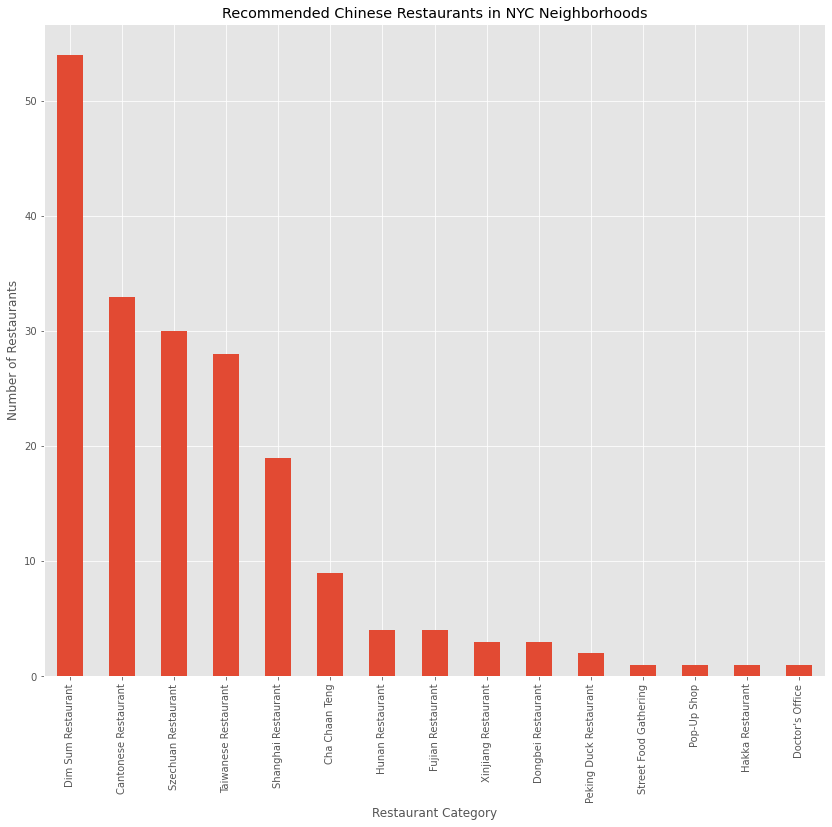

In [43]:
# Generate bar chart to show the distribution of the Recommended Chinese Restaurants in NYC Neighborhoods
df_numbrofrestaurants.plot(kind='bar', figsize=(14, 12))

plt.xlabel('Restaurant Category') # add to x-label to the plot
plt.ylabel('Number of Restaurants') # add y-label to the plot
plt.title('Recommended Chinese Restaurants in NYC Neighborhoods') # add title to the plot

plt.show()

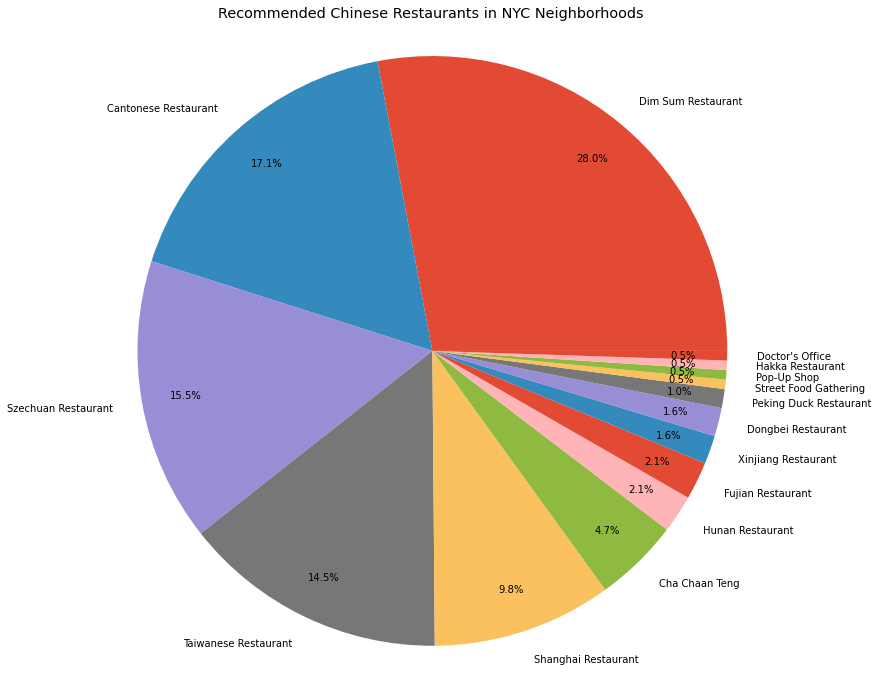

In [42]:
# Generate pie chart to show the distribution of the Recommended Chinese Restaurants in NYC Neighborhoods
# autopct create %, start angle represent starting point
df_numbrofrestaurants.plot(kind = 'pie',
                            figsize = (14, 12),
                            autopct= '%1.1f%%', # add in percentages
                            startangle = 0,     # start angle 0° 
                            shadow = False,       # no shadow      
                            pctdistance = 0.85
                          )

plt.title('Recommended Chinese Restaurants in NYC Neighborhoods')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.ylabel('')

plt.show()

## <font color=blue>7. Neighborhood clustering analysis based on the recommended Chinese restaurants</font>

In [44]:
# one hot encoding
NYC_onehot = pd.get_dummies(NYC_CNRestaurants_Recmd[['Restaurant Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NYC_onehot['Neighborhood'] = NYC_CNRestaurants_Recmd['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [NYC_onehot.columns[-1]] + list(NYC_onehot.columns[:-1])
NYC_onehot = NYC_onehot[fixed_columns]

NYC_onehot.head()

,Neighborhood,Cantonese Restaurant,Cha Chaan Teng,Dim Sum Restaurant,Doctor's Office,Dongbei Restaurant,Fujian Restaurant,Hakka Restaurant,Hunan Restaurant,Peking Duck Restaurant,Pop-Up Shop,Shanghai Restaurant,Street Food Gathering,Szechuan Restaurant,Taiwanese Restaurant,Xinjiang Restaurant
0,University Heights,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Bay Ridge,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,Bensonhurst,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bensonhurst,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Greenpoint,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [45]:
NYC_onehot.shape

(193, 16)

In [46]:
# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
NYC_grouped = NYC_onehot.groupby('Neighborhood').mean().reset_index()
NYC_grouped.head()

,Neighborhood,Cantonese Restaurant,Cha Chaan Teng,Dim Sum Restaurant,Doctor's Office,Dongbei Restaurant,Fujian Restaurant,Hakka Restaurant,Hunan Restaurant,Peking Duck Restaurant,Pop-Up Shop,Shanghai Restaurant,Street Food Gathering,Szechuan Restaurant,Taiwanese Restaurant,Xinjiang Restaurant
0,Bath Beach,0.75,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Battery Park City,0.00,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
2,Bay Ridge,0.00,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayside,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Bensonhurst,0.50,0.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# Confirm the new size of the dataframe
NYC_grouped.shape

(45, 16)

In [48]:
# Print each neighborhood along with the top 5 most commonly recommended Chinese restaurants
num_top_restaurants = 5

for hood in NYC_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = NYC_grouped[NYC_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['restaurant','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_restaurants))
    print('\n')

----Bath Beach----
             restaurant  freq
0  Cantonese Restaurant  0.75
1    Dim Sum Restaurant  0.25
2        Cha Chaan Teng  0.00
3       Doctor's Office  0.00
4    Dongbei Restaurant  0.00


----Battery Park City----
              restaurant  freq
0     Dim Sum Restaurant   0.5
1  Street Food Gathering   0.5
2   Cantonese Restaurant   0.0
3         Cha Chaan Teng   0.0
4        Doctor's Office   0.0


----Bay Ridge----
             restaurant  freq
0    Dim Sum Restaurant   1.0
1  Cantonese Restaurant   0.0
2        Cha Chaan Teng   0.0
3       Doctor's Office   0.0
4    Dongbei Restaurant   0.0


----Bayside----
             restaurant  freq
0   Shanghai Restaurant   1.0
1  Cantonese Restaurant   0.0
2        Cha Chaan Teng   0.0
3    Dim Sum Restaurant   0.0
4       Doctor's Office   0.0


----Bensonhurst----
             restaurant  freq
0  Cantonese Restaurant   0.5
1        Cha Chaan Teng   0.5
2    Dim Sum Restaurant   0.0
3       Doctor's Office   0.0
4    Dongbei Rest

In [49]:
# Define a function to sort the restaurants in descending order
def return_most_common_restaurants(row, num_top_restaurants):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_restaurants]

In [50]:
# Create the new dataframe and display the top 10 venues for each neighborhood
num_top_restaurants = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_restaurants):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
neighborhoods_restaurants_sorted = pd.DataFrame(columns=columns)
neighborhoods_restaurants_sorted['Neighborhood'] = NYC_grouped['Neighborhood']

for ind in np.arange(NYC_grouped.shape[0]):
    neighborhoods_restaurants_sorted.iloc[ind, 1:] = return_most_common_restaurants(NYC_grouped.iloc[ind, :], num_top_restaurants)

neighborhoods_restaurants_sorted.head()

,Neighborhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Bath Beach,Cantonese Restaurant,Dim Sum Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant
1,Battery Park City,Street Food Gathering,Dim Sum Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant
2,Bay Ridge,Dim Sum Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant
3,Bayside,Shanghai Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant,Fujian Restaurant
4,Bensonhurst,Cha Chaan Teng,Cantonese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant


In [51]:
# Define the data x for clustering fitting
NYC_grouped_clustering = NYC_grouped.drop('Neighborhood', 1)
x = NYC_grouped_clustering

### <font color=blue>Determine the optimal k for KMeans clustering analysis</font>

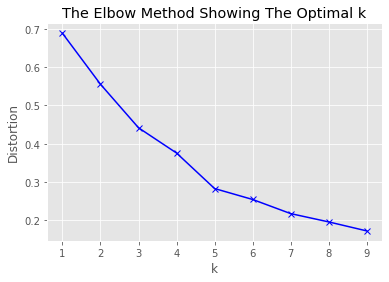

In [52]:
# Determine k for KMeans clustering using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing The Optimal k')
plt.show()

Text(0.5, 1.0, 'The Silhouette Method Showing The Optimal k')

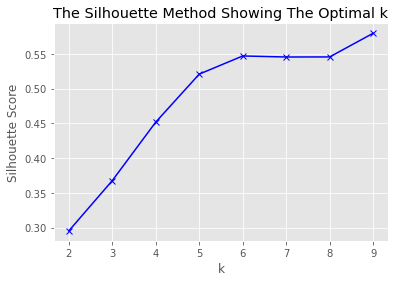

In [56]:
# Determine k for KMeans clustering using silhouette_score method

from sklearn.metrics import silhouette_score
k_x = []
sil = []

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k).fit(x)
    k_x.append(k)
    labels = kmeans.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

plt.plot(k_x, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method Showing The Optimal k')

### <font color=blue>Cluster neighborhoods</font>

In [57]:
# Run k-means to cluster the neighborhood into 4 clusters
# set number of clusters at 4 as the optimal k as showed above
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(x)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[:] 

array([3, 3, 2, 4, 3, 2, 3, 2, 0, 4, 3, 3, 0, 3, 3, 3, 3, 1, 1, 2, 2, 1,
       3, 1, 2, 3, 3, 1, 1, 3, 1, 2, 2, 3, 0, 3, 4, 1, 2, 2, 2, 3, 0, 3,
       1])

In [58]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood
# add clustering labels
neighborhoods_restaurants_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

NYC_merged = neighborhoods

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
NYC_merged = NYC_merged.join(neighborhoods_restaurants_sorted.set_index('Neighborhood'), on='Neighborhood')

NYC_merged[:20] # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Bronx,Wakefield,40.894705,-73.847201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bronx,Co-op City,40.874294,-73.829939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bronx,Eastchester,40.887556,-73.827806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bronx,Fieldston,40.895437,-73.905643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bronx,Riverdale,40.890834,-73.912585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Bronx,Kingsbridge,40.881687,-73.902818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Manhattan,Marble Hill,40.876551,-73.910660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Bronx,Woodlawn,40.898273,-73.867315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Bronx,Norwood,40.877224,-73.879391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Bronx,Williamsbridge,40.881039,-73.857446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# Clean dataframe by dropping rows with 'NaN'
NYC_merged_cleaned = NYC_merged.dropna()
NYC_merged_cleaned

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
14,Bronx,University Heights,40.855727,-73.910416,2.0,Dim Sum Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant
46,Brooklyn,Bay Ridge,40.625801,-74.030621,2.0,Dim Sum Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant
47,Brooklyn,Bensonhurst,40.611009,-73.995180,3.0,Cha Chaan Teng,Cantonese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant
49,Brooklyn,Greenpoint,40.730201,-73.954241,1.0,Szechuan Restaurant,Shanghai Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Street Food Gathering,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant,Fujian Restaurant
79,Brooklyn,Bath Beach,40.599519,-73.998752,3.0,Cantonese Restaurant,Dim Sum Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant
81,Brooklyn,Dyker Heights,40.619219,-74.019314,3.0,Cantonese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant
86,Brooklyn,Downtown,40.690844,-73.983463,4.0,Shanghai Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant,Fujian Restaurant
95,Brooklyn,East Williamsburg,40.708492,-73.938858,0.0,Taiwanese Restaurant,Xinjiang Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant,Fujian Restaurant
96,Brooklyn,North Side,40.714823,-73.958809,3.0,Szechuan Restaurant,Dim Sum Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant
100,Manhattan,Chinatown,40.715618,-73.994279,3.0,Dim Sum Restaurant,Cantonese Restaurant,Taiwanese Restaurant,Cha Chaan Teng,Shanghai Restaurant,Szechuan Restaurant,Fujian Restaurant,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant


In [60]:
# Convert Cluster Labels from float to integer
NYC_merged_cluster_int = NYC_merged_cleaned.astype({"Cluster Labels": int})
NYC_merged_cluster_int

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
14,Bronx,University Heights,40.855727,-73.910416,2,Dim Sum Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant
46,Brooklyn,Bay Ridge,40.625801,-74.030621,2,Dim Sum Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant
47,Brooklyn,Bensonhurst,40.611009,-73.995180,3,Cha Chaan Teng,Cantonese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant
49,Brooklyn,Greenpoint,40.730201,-73.954241,1,Szechuan Restaurant,Shanghai Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Street Food Gathering,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant,Fujian Restaurant
79,Brooklyn,Bath Beach,40.599519,-73.998752,3,Cantonese Restaurant,Dim Sum Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant
81,Brooklyn,Dyker Heights,40.619219,-74.019314,3,Cantonese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant
86,Brooklyn,Downtown,40.690844,-73.983463,4,Shanghai Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant,Fujian Restaurant
95,Brooklyn,East Williamsburg,40.708492,-73.938858,0,Taiwanese Restaurant,Xinjiang Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant,Fujian Restaurant
96,Brooklyn,North Side,40.714823,-73.958809,3,Szechuan Restaurant,Dim Sum Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant
100,Manhattan,Chinatown,40.715618,-73.994279,3,Dim Sum Restaurant,Cantonese Restaurant,Taiwanese Restaurant,Cha Chaan Teng,Shanghai Restaurant,Szechuan Restaurant,Fujian Restaurant,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant


## <font color=blue>8. Visualize the resulting clusters on NYC map</font>

In [69]:
# Get the geograpical coordinate of New York City
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [70]:
# Visualize the resulting clusters on NYC map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, control_scale = True)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NYC_merged_cluster_int['Latitude'], NYC_merged_cluster_int['Longitude'], NYC_merged_cluster_int['Neighborhood'], NYC_merged_cluster_int['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = rainbow[cluster-1],
        fill = True,
        fill_color = rainbow[cluster-1],
        fill_opacity = 0.7).add_to(map_clusters)
       
map_clusters

## <font color=blue>9. Examine clusters</font>

In [64]:
# Examine each cluster and determine the discriminating restaurants categories that distinguish each cluster
# Based on the defining categories, a name can be assigned to each cluster
NYC_merged_cluster_int.loc[NYC_merged_cluster_int['Cluster Labels'] == 0, NYC_merged_cluster_int.columns[[1] + list(range(5, NYC_merged_cluster_int.shape[1]))]]

,Neighborhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
95,East Williamsburg,Taiwanese Restaurant,Xinjiang Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant,Fujian Restaurant
149,College Point,Taiwanese Restaurant,Xinjiang Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant,Fujian Restaurant
161,Oakland Gardens,Taiwanese Restaurant,Xinjiang Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant,Fujian Restaurant
280,Vinegar Hill,Taiwanese Restaurant,Xinjiang Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant,Fujian Restaurant


In [65]:
NYC_merged_cluster_int.loc[NYC_merged_cluster_int['Cluster Labels'] == 1, NYC_merged_cluster_int.columns[[1] + list(range(5, NYC_merged_cluster_int.shape[1]))]]

,Neighborhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
49,Greenpoint,Szechuan Restaurant,Shanghai Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Street Food Gathering,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant,Fujian Restaurant
108,Yorkville,Szechuan Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant,Fujian Restaurant
109,Lenox Hill,Szechuan Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant,Fujian Restaurant
114,Midtown,Szechuan Restaurant,Taiwanese Restaurant,Xinjiang Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant,Fujian Restaurant
115,Murray Hill,Szechuan Restaurant,Shanghai Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Street Food Gathering,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant,Fujian Restaurant
117,Greenwich Village,Szechuan Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant,Fujian Restaurant
124,Manhattan Valley,Szechuan Restaurant,Hunan Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hakka Restaurant,Fujian Restaurant
180,Murray Hill,Szechuan Restaurant,Shanghai Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Street Food Gathering,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant,Fujian Restaurant
271,Sutton Place,Szechuan Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant,Fujian Restaurant
272,Hunters Point,Taiwanese Restaurant,Szechuan Restaurant,Xinjiang Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant,Fujian Restaurant


In [66]:
NYC_merged_cluster_int.loc[NYC_merged_cluster_int['Cluster Labels'] == 2, NYC_merged_cluster_int.columns[[1] + list(range(5, NYC_merged_cluster_int.shape[1]))]]

,Neighborhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
14,University Heights,Dim Sum Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant
46,Bay Ridge,Dim Sum Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant
112,Lincoln Square,Dim Sum Restaurant,Peking Duck Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Hunan Restaurant,Hakka Restaurant
113,Clinton,Dim Sum Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant
116,Chelsea,Dim Sum Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant
185,Hillcrest,Dim Sum Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant
211,New Dorp,Dim Sum Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant
244,Chelsea,Dim Sum Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant
248,Noho,Dim Sum Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant
273,Turtle Bay,Dim Sum Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant


In [67]:
NYC_merged_cluster_int.loc[NYC_merged_cluster_int['Cluster Labels'] == 3, NYC_merged_cluster_int.columns[[1] + list(range(5, NYC_merged_cluster_int.shape[1]))]]

,Neighborhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
47,Bensonhurst,Cha Chaan Teng,Cantonese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant
79,Bath Beach,Cantonese Restaurant,Dim Sum Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant
81,Dyker Heights,Cantonese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant
96,North Side,Szechuan Restaurant,Dim Sum Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant
100,Chinatown,Dim Sum Restaurant,Cantonese Restaurant,Taiwanese Restaurant,Cha Chaan Teng,Shanghai Restaurant,Szechuan Restaurant,Fujian Restaurant,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant
107,Upper East Side,Dim Sum Restaurant,Cantonese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant
118,East Village,Taiwanese Restaurant,Szechuan Restaurant,Dim Sum Restaurant,Cantonese Restaurant,Xinjiang Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant
121,Little Italy,Dim Sum Restaurant,Cantonese Restaurant,Pop-Up Shop,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Peking Duck Restaurant,Hunan Restaurant
123,West Village,Taiwanese Restaurant,Dim Sum Restaurant,Cantonese Restaurant,Xinjiang Restaurant,Szechuan Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant
126,Gramercy,Dim Sum Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Xinjiang Restaurant,Street Food Gathering,Shanghai Restaurant,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant


In [68]:
NYC_merged_cluster_int.loc[NYC_merged_cluster_int['Cluster Labels'] == 4, NYC_merged_cluster_int.columns[[1] + list(range(5, NYC_merged_cluster_int.shape[1]))]]

,Neighborhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
86,Downtown,Shanghai Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant,Fujian Restaurant
145,Rego Park,Shanghai Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant,Fujian Restaurant
151,Bayside,Shanghai Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Street Food Gathering,Pop-Up Shop,Peking Duck Restaurant,Hunan Restaurant,Hakka Restaurant,Fujian Restaurant


In [77]:
!tar chvfz notebook.tar.gz *